# Clasificación con K Nearest Neighbors

Vamos a utilizar NumPy para las operaciones con matrices y Matplotlib para generar algunas gráficas. Para mostrar las gráficas 
en el notebook Jupyter se importa también la función display.

In [1]:
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt

En machine learning tan importante como el algoritmo que hayamos decidido usar son los datos con los que lo vamos a alimentar. 
En este caso vamos a fabricarlos de forma aleatoria. El código anterior genera cincuenta muestras 
(o puntos o ejemplos, como prefieras) pero he hecho un poco de trampa. Se han creado alrededor de dos puntos distantes para que
visualmente queden bien diferenciados. Para mantener la generalidad en todo momento he etiquetado con el valor 0 los puntos 
pertenecientes a la primera clase y con 1 los de la segunda. Una vez tenemos los datos los ponemos en una matriz de NumPy 
para poder operar con ellos. Finalmente mostramos la gráfica con los puntos, en azul los de la clase 0 y en verde los de la 
clase 1. Este es el resultado.

<module 'matplotlib.pyplot' from 'C:\\Users\\Manuel Aguilar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

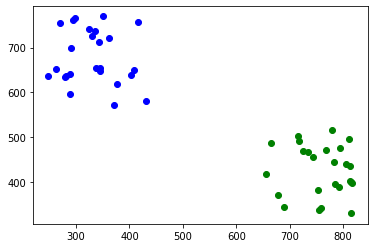

In [2]:
n = 50 # 50 muestras aleatorias
# generamos dos centros para las dos clases de puntos para entrenamiento 
c1 = [random.randint(0,1000), random.randint(0,1000)]
c2 = [random.randint(0,1000), random.randint(0,1000)]
# generamos las muestras aleatorias alrededor de los centros
tuplasC1 = []
tuplasC2 = []
labelsC1 = []
labelsC2 = []
for i in range(int(n/2)):
    tuplasC1.append([c1[0] + random.randint(-100,100), c1[1] + random.randint(-100,100)])
    labelsC1.append(0)
    tuplasC2.append([c2[0] + random.randint(-100,100), c2[1] + random.randint(-100,100)])
    labelsC2.append(1)

labels = labelsC1 + labelsC2
puntos = np.matrix(tuplasC1 + tuplasC2)
# dibujamos los puntos
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
display(plt)

También necesitamos datos nuevos, es decir, aquellos que queremos clasificar.

<module 'matplotlib.pyplot' from 'C:\\Users\\Manuel Aguilar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

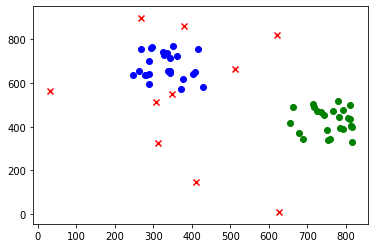

In [3]:
# generamos puntos aleatorios nuevos para clasificarlos
n_test = 10
tuplas = []
for i in range(n_test):
    tuplas.append([random.randint(0,1000), random.randint(0,1000)])
    
puntos_test = np.matrix(tuplas)
# dibujamos los nuevos puntos junto con los anteriores
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
plt.scatter([puntos_test[:,0]], [puntos_test[:,1]], c='r', marker='x')
display(plt)

Generamos diez puntos nuevos de forma totalmente aleatoria y mostramos la gráfica para ver por donde han caído (se muestran como X de color rojo).

In [4]:
# usamos KNN para clasificar los nuevos puntos
k = 5 # número de vecinos

pred_label = []
# clasificamos cada uno de los puntos nuevos
for i in range(puntos_test.shape[0]):
    distances = []
    # por cada punto calculamos la distancia con los puntos de entrenamiento 
    for j in range(puntos.shape[0]):
        dist = np.sqrt(np.sum(np.square(puntos[j] - puntos_test[i])))
        distances.append((dist, labels[j])) # guardamos las etiquetas y la distancia

    # ordenamos por distancia y nos quedamos con los k vecinos más cercanos
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    # contamos los votos para ver qué etiqueta gana
    votes = [0,0]
    for neighbor in neighbors:
        votes[neighbor[1]] = votes[neighbor[1]] + 1
    # obtenemos la etiqueta ganadora
    pred_label.append(votes.index(max(votes)))

El primer bucle i va recorriendo la matriz de los puntos a etiquetar (recuerda que eran 10) y en el bucle interno j los 
comparamos con cada uno de los ejemplos o puntos del dataset de entrenamiento (recuerda que eran 50). Como ves no hay mucho 
misterio: calculamos la distancia entre ambos puntos operando matricialmente con NumPy y almacenamos dicha distancia junto 
a la clase (etiqueta) a la que pertenece el punto con el que estamos comparando. Una vez hemos medido todas las distancias 
las ordenamos y nos quedamos con las k menores (en este caso k=5). Ahora necesitamos saber a qué clases pertenecen 
los k vecinos más cercanos. Como hemos almacenado su etiqueta junto con la distancia, sometemos la decisión a un proceso de votación. 
Cada uno de los k vecinos vota con su etiqueta y la ganadora se asigna al nuevo punto.

<module 'matplotlib.pyplot' from 'C:\\Users\\Manuel Aguilar\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

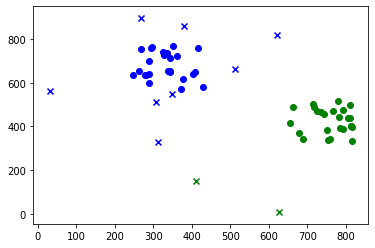

In [5]:
# separar los datos clasificados para dibujarlos
g0 = []
g1 = []
for i in range(len(pred_label)):
    if pred_label[i] == 0:
        g0.append([puntos_test[i,0], puntos_test[i,1]])
    else:
        g1.append([puntos_test[i,0], puntos_test[i,1]])
        
grupo0 = np.matrix(g0)
grupo1 = np.matrix(g1)

# mostrar datos ya clasificados
plt.scatter([puntos[:int(n/2),0]], [puntos[:int(n/2),1]], c="b")
plt.scatter([puntos[int(n/2):,0]], [puntos[int(n/2):,1]], c="g")
plt.scatter([grupo0[:,0]], [grupo0[:,1]], c='b', marker='x')
plt.scatter([grupo1[:,0]], [grupo1[:,1]], c='g', marker='x')
display(plt)

Ahora que hemos clasificados los nuevos puntos los metemos en una matriz simplemente para representarlos en una gráfica, junto 
con el color definitivo que le corresponde según han sido clasificados por k-nn. De esta forma comprobamos visualmente si 
la clasificación ha ido según lo esperado.